# 0. IMPORTS

## 0.1. Python Libraries

In [66]:
import inflection

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 0.2. Helper Functions

### 0.2.1. Get Attributes

In [30]:
def get_numerical_attributes(data):
    return data.select_dtypes(include=['int64', 'float64'])

In [31]:
def get_categorical_attributes(data):
    return data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 0.2.2. Get Descriptive Info

In [41]:
def get_descriptive_info(data):
    num_attributes = get_numerical_attributes(data)
    
    # Central Tendency - mean, median
    df_mean = pd.DataFrame(num_attributes.apply(np.mean)).T
    df_median = pd.DataFrame(num_attributes.apply(np.median)).T
    
    # Dispersion - std, min, max, range, skew, kurtosis
    df_std = pd.DataFrame(num_attributes.apply(np.std)).T
    df_min = pd.DataFrame(num_attributes.apply(np.min)).T
    df_max = pd.DataFrame(num_attributes.apply(np.max)).T
    df_range = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    df_skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    df_kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
    
    #min, max, range, mean, median, std, skew, kurtosis
    df_descriptive_info = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurtosis]).T.reset_index()
    
    df_descriptive_info.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    return df_descriptive_info

## 0.3. Loading Data

In [13]:
df_train_raw = pd.read_csv('data/train.csv', low_memory=False)

# 1. DESCRIPTION DATA

In [14]:
df1 = df_train_raw.copy()

In [26]:
df1.sample(5).T

,305928,184462,23568,93010,323453
id,305929,184463,23569,93011,323454
gender,Male,Female,Female,Female,Female
age,23,26,24,35,58
driving_license,1,1,1,1,1
region_code,25.0,5.0,28.0,28.0,28.0
previously_insured,1,0,1,1,0
vehicle_age,< 1 Year,< 1 Year,< 1 Year,1-2 Year,> 2 Years
vehicle_damage,No,No,No,No,Yes
annual_premium,29166.0,37680.0,50515.0,43461.0,50179.0
policy_sales_channel,152.0,152.0,152.0,125.0,26.0


## 1.1. Rename Columns

In [23]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [24]:
df1.columns = df1.columns.map(lambda x: inflection.underscore(x))

In [25]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.2. Data Dimension

In [27]:
print(f'Number of Rows {df1.shape[0]}')
print(f'Number of Features {df1.shape[1]}')

Number of Rows 381109
Number of Features 12


## 1.3. Data Types

In [28]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4. Check NA

In [29]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. Change Data Types

## 1.6 Descriptive Info

In [42]:
get_descriptive_info(df1)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


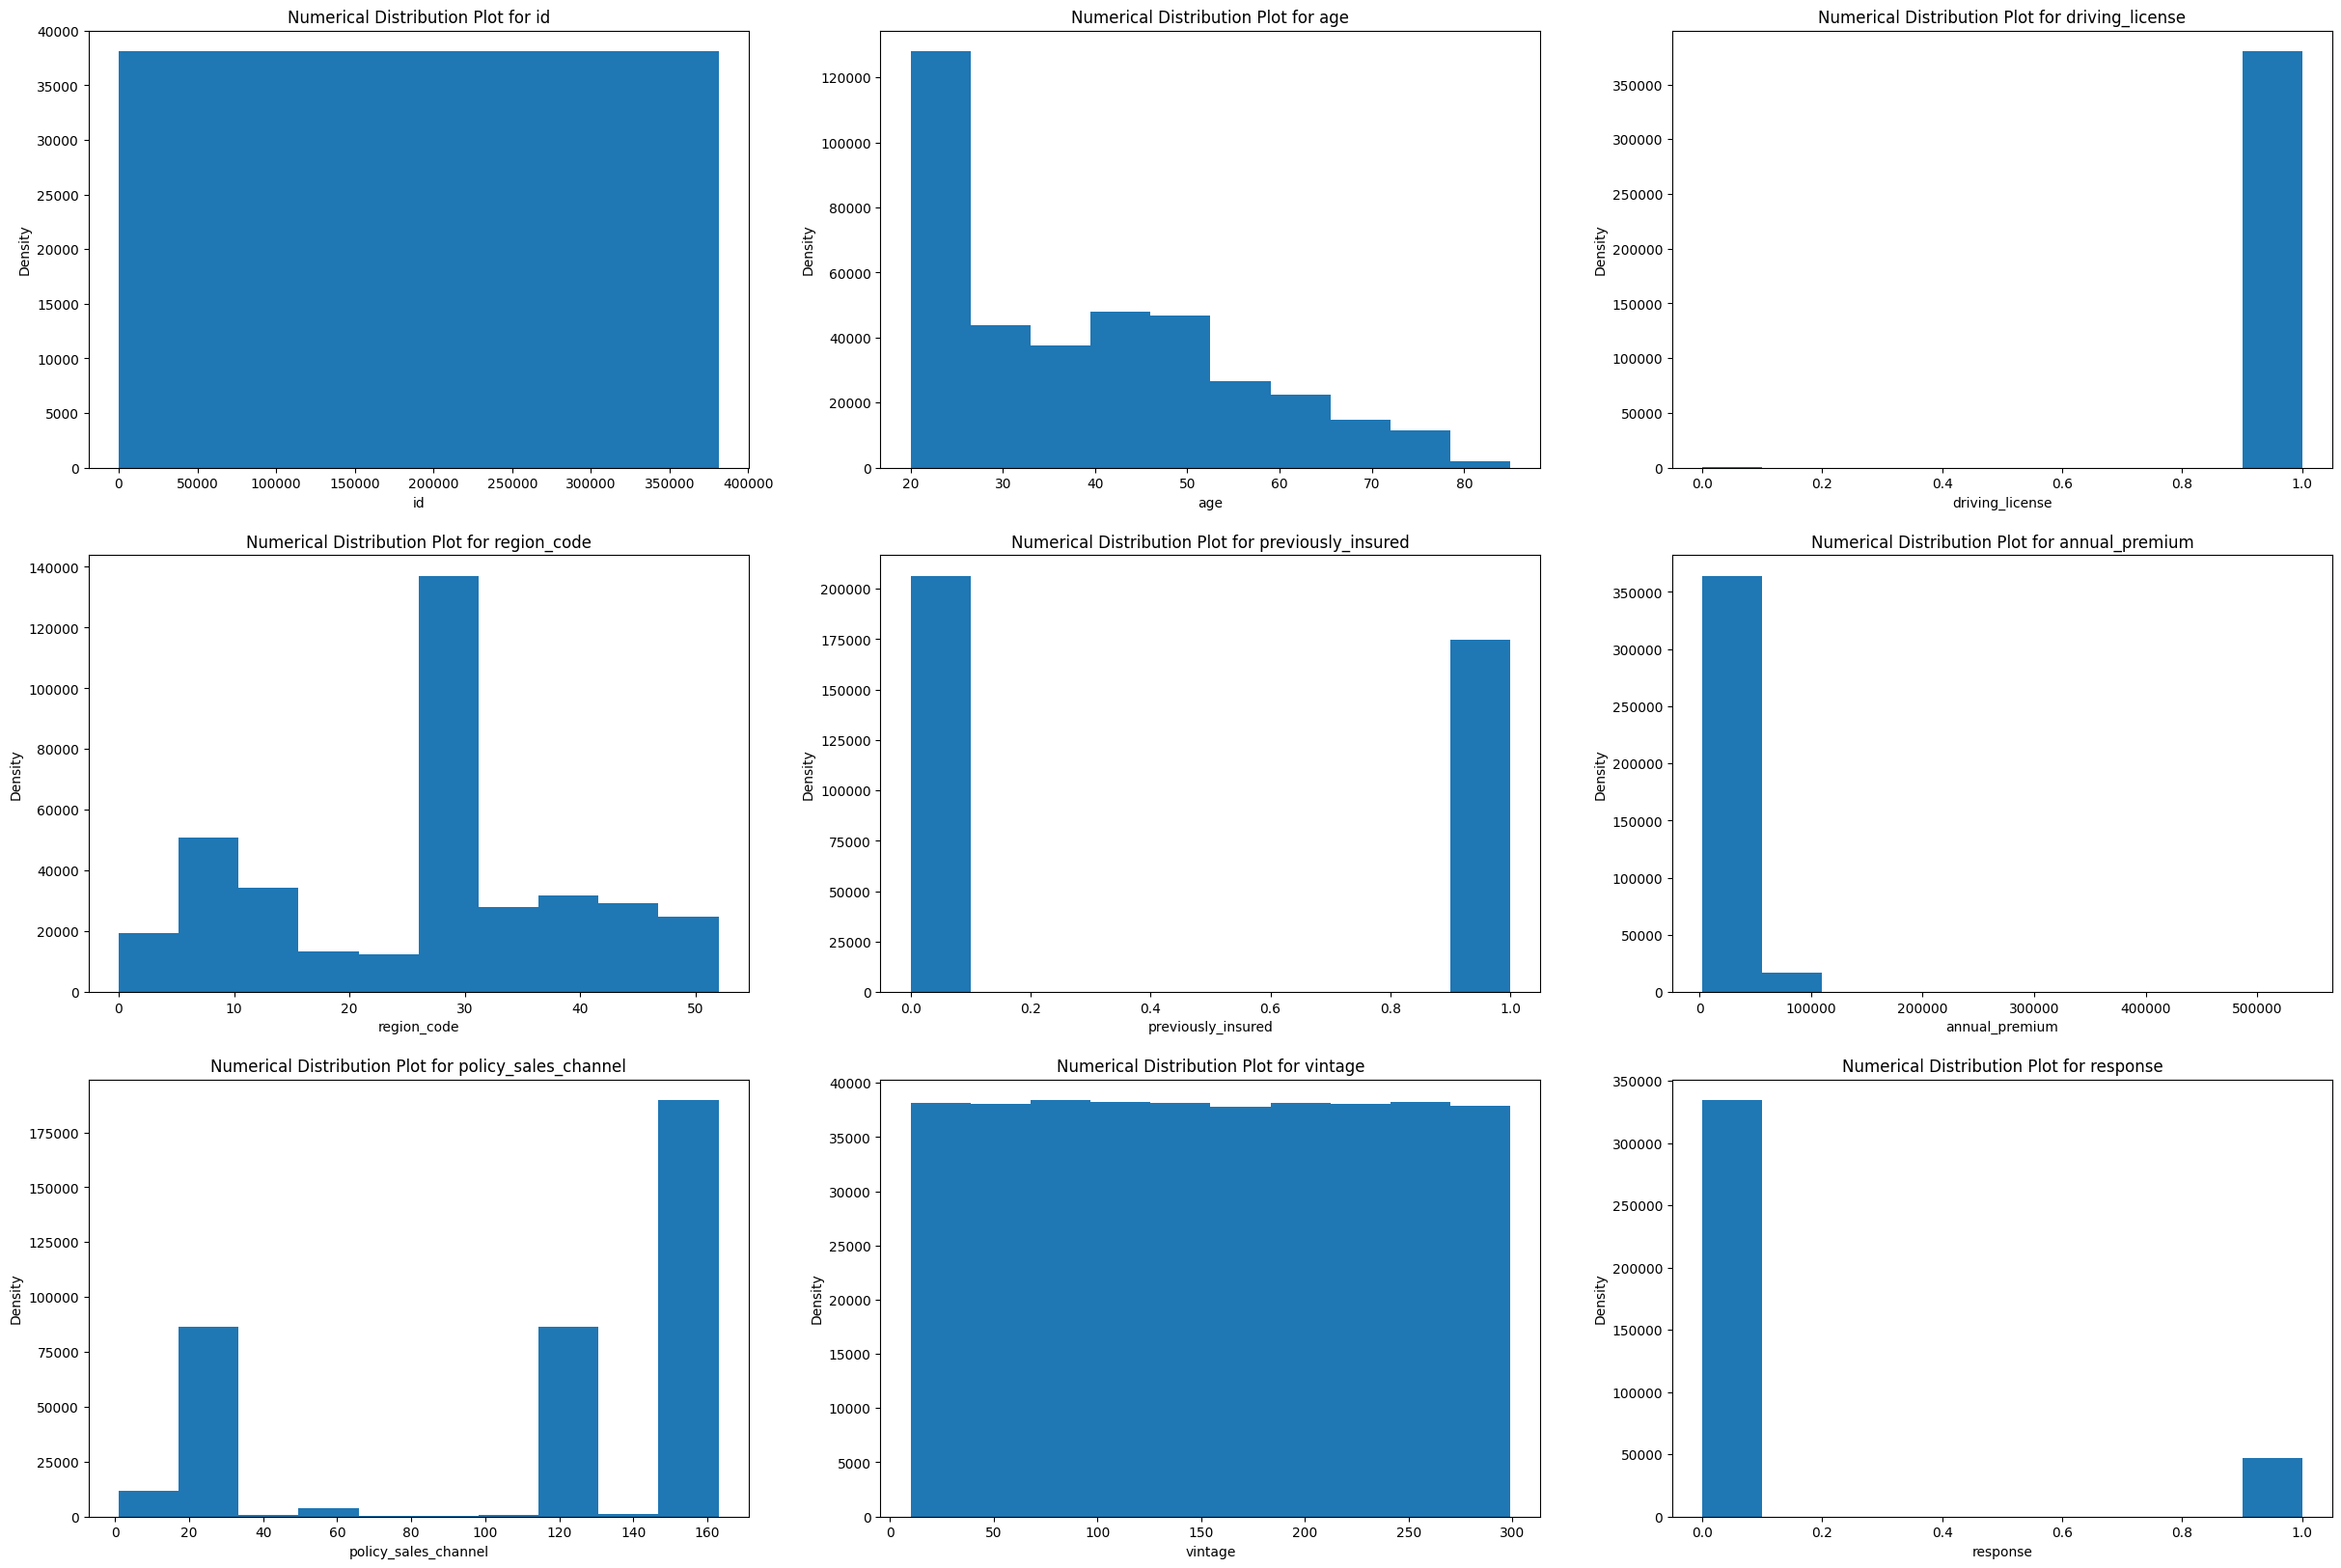

In [61]:
plt.figure(figsize=(30, 20))

for i, column in enumerate(get_numerical_attributes(df1).columns):
    plt.subplot(3, 3, i+1)
    plt.hist(df1[column]);
    plt.title(f'Numerical Distribution Plot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')

<Axes: xlabel='vehicle_age', ylabel='response'>

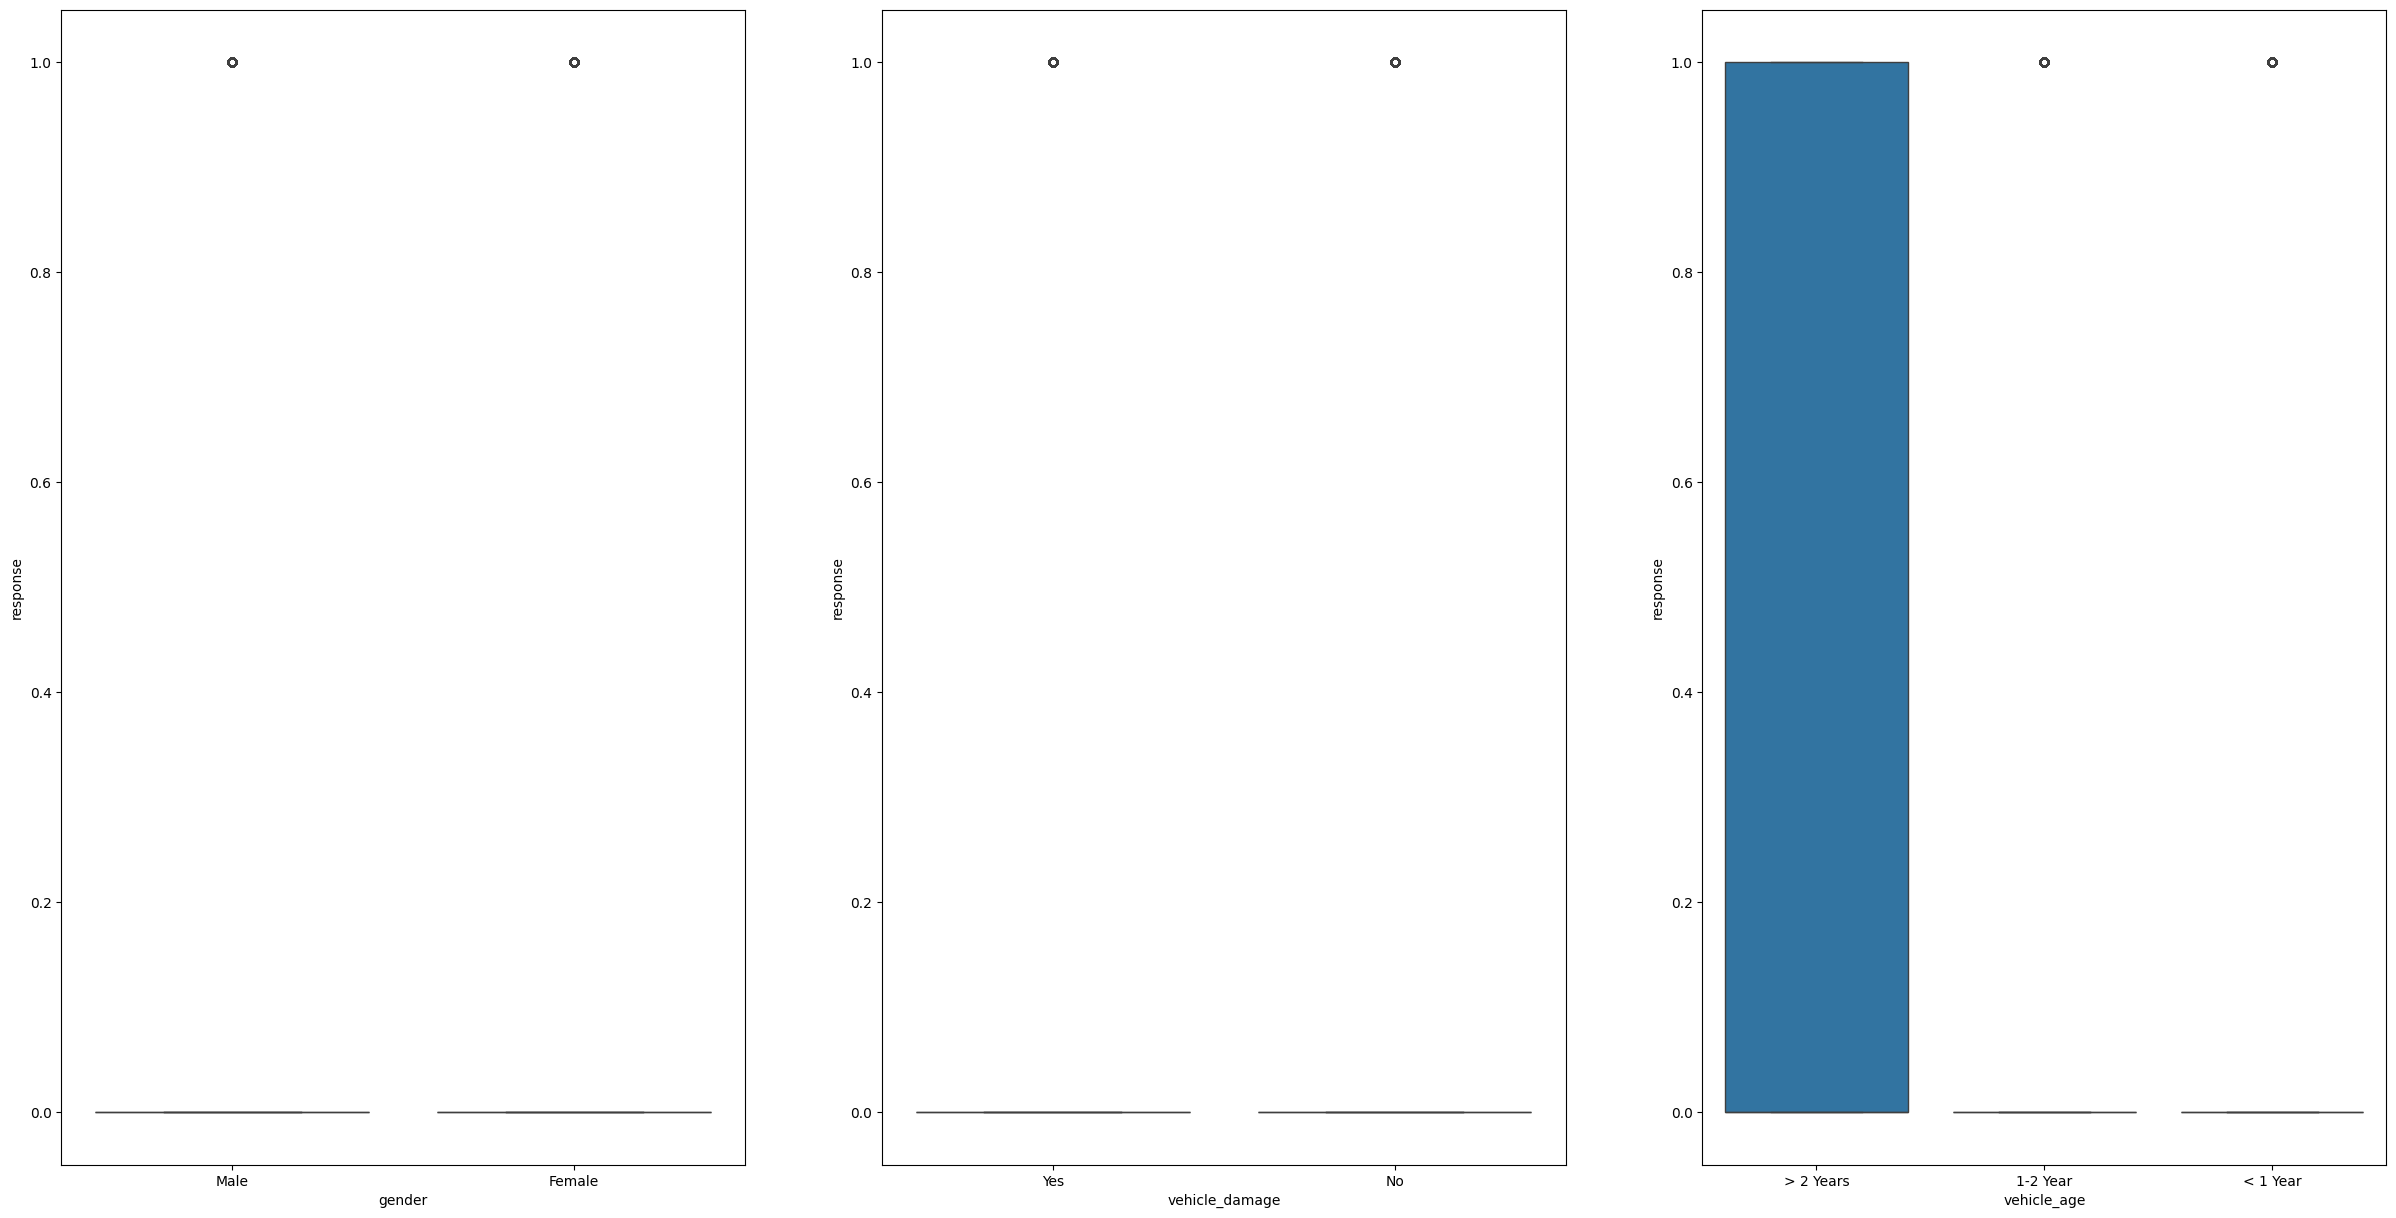

In [70]:
plt.figure(figsize=(30, 15))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='response', data=df1)

plt.subplot(1, 3, 2)
sns.boxplot(x='vehicle_damage', y='response', data=df1)

plt.subplot(1, 3, 3)
sns.boxplot(x='vehicle_age', y='response', data=df1)